In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Sequential
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.callbacks import EarlyStopping
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.model_selection import train_test_split
import os
import time

In [3]:
physical_device = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(physical_device[0], True)
except:
    print("error")


In [4]:
 features  = ["bus","motorcycle","plane","train"]

In [7]:
file_dir = 'Vehicle2'
def dataset(file_directory):
    featured = []
    labelled = []
    for feature in features:
        label = features.index(feature)
        file = os.path.join(file_directory, feature)
        for path in os.listdir(file):  
            img = os.path.join(file, path)
            images = cv2.imread(img)
            pics = cv2.resize(images, (64,64))
            featured.append(pics)
            labelled.append(label)
    print("Done!!!")
    return featured, labelled

In [8]:
feature, label = dataset(file_dir)

Done!!!


In [9]:
feature = np.array(feature)
feature = feature/255.0
label = np.array(label)
print(feature.shape), print(label.shape)

(80, 64, 64, 3)
(80,)


(None, None)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size = 0.20, shuffle = True, random_state = 42)

In [11]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape )

(64, 64, 64, 3) (16, 64, 64, 3) (64,) (16,)


In [12]:
num_classes = 4
img_height = 64
img_width = 64

In [13]:
model = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))
    layers.Conv2D(16, 3, padding=('same'), activation = 'relu',input_shape = (img_height,img_width,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)   
])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [15]:
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss =  keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

G:\Anaconda\envs\tensorflow\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [16]:
history = model.fit(x_train, y_train,batch_size=16,epochs=2,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
4/4 [==============================] - 50s 235ms/step - loss: 1.4626 - accuracy: 0.2969 - val_loss: 1.4695 - val_accuracy: 0.1250
Epoch 2/2
4/4 [==============================] - 0s 28ms/step - loss: 1.3111 - accuracy: 0.4531 - val_loss: 1.3261 - val_accuracy: 0.3125
Test loss: 1.3261157274246216
Test accuracy: 0.3125


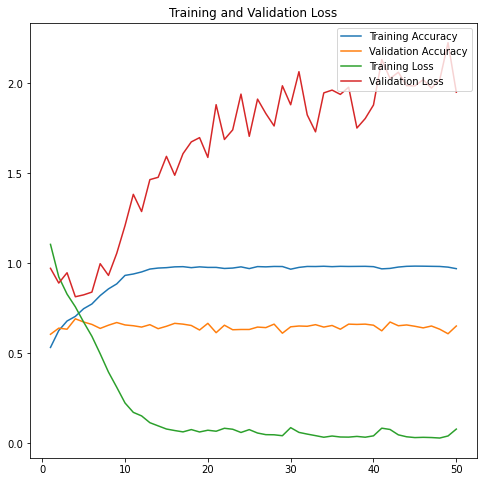

In [257]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Tradeoff between using many layers(9 layers) and accuracy?

In [14]:
model2 = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))
    layers.Conv2D(16, 3, padding=('same'), activation = 'relu',input_shape = (img_height,img_width,3)),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(256, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(512, 3, padding=('same'), activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes)   
])

In [15]:
optimizer = keras.optimizers.Adam(lr=0.001)
model2.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

In [16]:
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 8, 8, 128)        

In [17]:
history2 = model2.fit(x_train, y_train,batch_size=16,epochs=50,verbose=1,validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1]*100)

Train on 2696 samples, validate on 674 samples
Epoch 1/50
2696/2696 [==============================] - 39s 15ms/sample - loss: 1.2543 - accuracy: 0.4191 - val_loss: 1.1617 - val_accuracy: 0.5045
Epoch 2/50
2696/2696 [==============================] - 17s 6ms/sample - loss: 1.0390 - accuracy: 0.5772 - val_loss: 0.9971 - val_accuracy: 0.5593
Epoch 3/50
2696/2696 [==============================] - 17s 6ms/sample - loss: 0.9500 - accuracy: 0.6198 - val_loss: 0.9247 - val_accuracy: 0.6395
Epoch 4/50
2696/2696 [==============================] - 17s 6ms/sample - loss: 0.8523 - accuracy: 0.6654 - val_loss: 0.8362 - val_accuracy: 0.6558
Epoch 5/50
2696/2696 [==============================] - 17s 6ms/sample - loss: 0.7924 - accuracy: 0.6777 - val_loss: 0.8460 - val_accuracy: 0.6632
Epoch 6/50
2696/2696 [==============================] - 18s 7ms/sample - loss: 0.7313 - accuracy: 0.7159 - val_loss: 0.9453 - val_accuracy: 0.5979
Epoch 7/50
2696/2696 [==============================] - 17s 6ms/sample

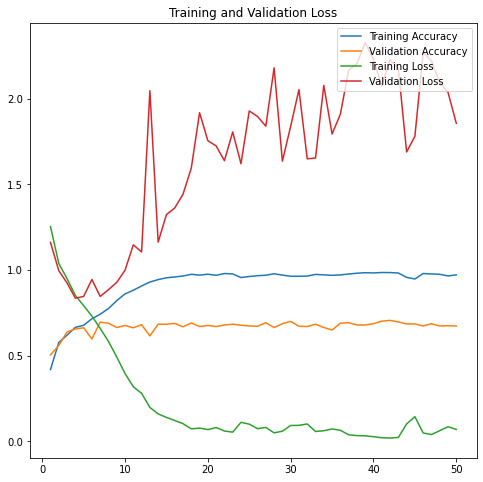

In [18]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()

# Effect of changing the pooling mechanism (Average Pooling)

In [264]:
model3 = Sequential([
    #layers.experimental.preprocessing.Rescaling(1./255,input_shape = (img_height,img_width,3))
    layers.Conv2D(16, 3, padding=('same'), activation = 'relu',input_shape = (img_height,img_width,3)),
    layers.AveragePooling2D(),
    layers.Conv2D(32, 3, padding=('same'), activation = 'relu'),
    layers.AveragePooling2D(),
    layers.Conv2D(64, 3, padding=('same'), activation = 'relu'),
    layers.AveragePooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)   
])

In [265]:
print(model3.summary())

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_116 (Conv2D)          (None, 64, 64, 16)        448       
_________________________________________________________________
average_pooling2d_3 (Average (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_117 (Conv2D)          (None, 32, 32, 32)        4640      
_________________________________________________________________
average_pooling2d_4 (Average (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_118 (Conv2D)          (None, 16, 16, 64)        18496     
_________________________________________________________________
average_pooling2d_5 (Average (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 4096)            

In [272]:
optimizer = keras.optimizers.Adam(lr=0.001)
model3.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer=optimizer,metrics=['accuracy'])

In [278]:
history3 = model3.fit(x_train, y_train,batch_size=16,epochs=50,verbose=1,validation_data=(x_test, y_test))
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 2696 samples, validate on 674 samples
Epoch 1/50
2696/2696 [==============================] - 6s 2ms/sample - loss: 0.0226 - accuracy: 0.9844 - val_loss: 1.8395 - val_accuracy: 0.6958
Epoch 2/50
2696/2696 [==============================] - 6s 2ms/sample - loss: 0.0217 - accuracy: 0.9822 - val_loss: 1.8985 - val_accuracy: 0.6766
Epoch 3/50
2696/2696 [==============================] - 6s 2ms/sample - loss: 0.0213 - accuracy: 0.9841 - val_loss: 1.9412 - val_accuracy: 0.6766
Epoch 4/50
2696/2696 [==============================] - 6s 2ms/sample - loss: 0.0225 - accuracy: 0.9826 - val_loss: 1.8555 - val_accuracy: 0.6914
Epoch 5/50
2696/2696 [==============================] - 5s 2ms/sample - loss: 0.0216 - accuracy: 0.9822 - val_loss: 1.8175 - val_accuracy: 0.6825
Epoch 6/50
2696/2696 [==============================] - 6s 2ms/sample - loss: 0.0219 - accuracy: 0.9837 - val_loss: 1.8197 - val_accuracy: 0.6780
Epoch 7/50
2696/2696 [==============================] - 6s 2ms/sample - loss:

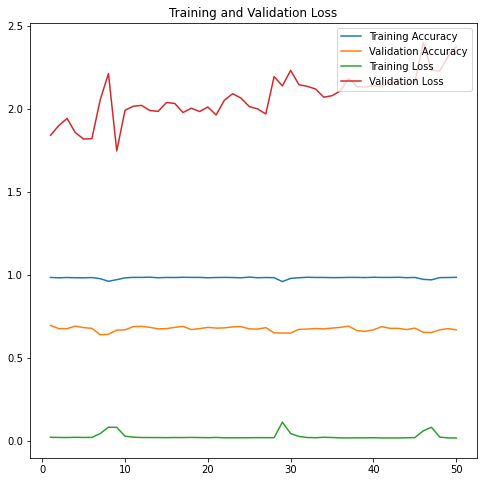

In [279]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs_range = range(1, len(loss) + 1)
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("water_quality_nn.pdf", dpi=100)
plt.show()